Nous allons d'abords importer les libraries nécéassaires : 


*   numpy : pour la manipulation des tableaux
*   matplotlib : pour la visualisation en 2 D
*   DBSCAN de sklearn.cluster : pour utiliser l'algorithme DBSCAN






In [0]:
import numpy as np 
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib
import matplotlib.pyplot as plt

In [0]:
from google.colab import files
files.upload()

Saving weather-stations.csv to weather-stations (1).csv


{'weather-stations.csv': b"Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,DwTn,S,DwS,S%N,P,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No\rCHEMAINUS,48.935,-123.742,BC,8.2,0,NA,13.5,0,1,0,0,0,NA,178.8,0,NA,0,12,,,NA,273.3,0,1011500\rCOWICHAN LAKE FORESTRY,48.824,-124.133,BC,7,0,3,15,0,-3,0,0,0,0,258.6,0,104,0,12,,,NA,307,0,1012040\rLAKE COWICHAN,48.829,-124.052,BC,6.8,13,2.8,16,9,-2.5,9,0,9,NA,264.6,9,NA,,11,,,NA,168.1,0,1012055\rDISCOVERY ISLAND,48.425,-123.226,BC,,,NA,12.5,0,,,,,NA,,,NA,,,,,NA,,,1012475\rDUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2,3.4,14.5,2,-1,2,0,2,NA,168.4,2,NA,,11,,,NA,267.7,0,1012573\rESQUIMALT HARBOUR,48.432,-123.439,BC,8.8,0,NA,13.1,0,1.9,0,,,NA,81,8,NA,,12,,,NA,258.6,0,1012710\rGALIANO NORTH,48.985,-123.573,BC,8.9,7,NA,13.5,7,2,7,0,7,NA,110,7,NA,0,10,,,NA,191.7,0,10130MN\rMALAHAT,48.575,-123.53,BC,7.2,1,NA,12.7,1,2.2,0,,,NA,108.8,10,NA,,12,,,NA,290.8,0,1014820\rMETCHOSIN,48.374,-123.561,BC,,,NA,,,,,0,0,0,102.6,0,95,0,16,,,NA,,,1015105\rNORTH COWICHAN,48.824,-123.718

In [0]:
import pandas as pd

weather_df = pd.read_csv('weather-stations.csv')
print ("Shape of the DataFrame: ", weather_df.shape)
weather_df.head(3) 

Shape of the DataFrame:  (1341, 25)


,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,DwTn,S,DwS,S%N,P,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,0.0,0.0,0.0,NaN,178.8,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,0.0,0.0,0.0,0.0,258.6,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,9.0,0.0,9.0,NaN,264.6,9.0,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055


In [0]:
weather_df.dropna(subset=['Tm', 'Tx', 'Tn'], inplace=True)
print ("After Dropping Rows that contains NaN on Mean, Max, Min Temperature Column: ", weather_df.shape)

After Dropping Rows that contains NaN on Mean, Max, Min Temperature Column:  (1255, 25)


In [0]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev
0 upgraded, 1 newly installed, 0 to remove and 28 not upgraded.
Need to get 73.1 kB of archives.
After this operation, 486 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd64 3.6.2-1build2 [73.1 kB]
Fetched 73.1 kB in 1s (117 kB/s)
Selecting previously unselected package libgeos-dev.
(Reading database ... 132681 files and directories currently installed.)
Preparing to unpack .../libgeos-dev_3.6.2-1build2_amd64.deb ...
Unpacking libgeos-dev (3.6.2-1build2) ...
Setting up libgeos-dev (3.6.2-1b

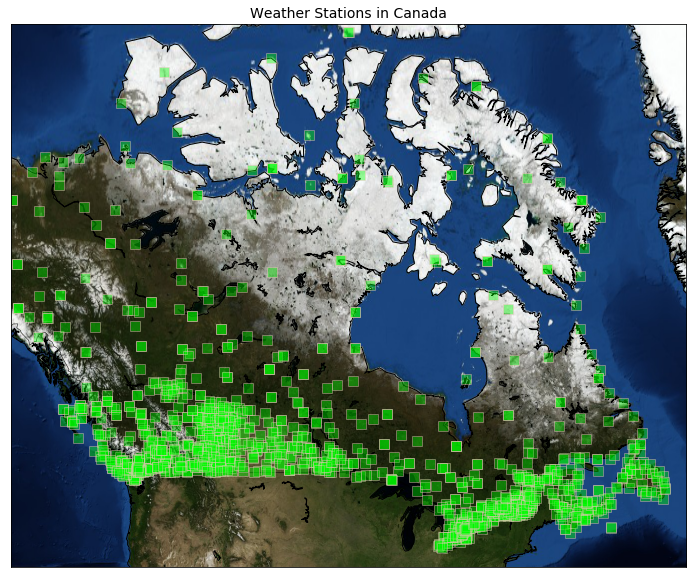

In [0]:
from mpl_toolkits.basemap import Basemap
import matplotlib
from PIL import Image
import matplotlib.pyplot as plt
#print (matplotlib.__version__)
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)


llon=-140
ulon=-50
llat=40
ulat=75

# selecting the boundaries of the map from lattitude and longitude 

weather_df = weather_df[(weather_df['Long'] > llon) & (weather_df['Long'] < ulon) & 
                        (weather_df['Lat'] > llat) &(weather_df['Lat'] < ulat)]



my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
my_map.drawlsmask(land_color='orange', ocean_color='skyblue')
#my_map.shadedrelief()
my_map.bluemarble()
# To collect data based on stations        

xs,ys = my_map(np.asarray(weather_df.Long), np.asarray(weather_df.Lat))
weather_df['xm']= xs.tolist()
weather_df['ym'] =ys.tolist()

#Visualization1
for index,row in weather_df.iterrows():
#   x,y = my_map(row.Long, row.Lat)
   my_map.plot(row.xm, row.ym,markerfacecolor ='lime',markeredgecolor='pink', marker='s', markersize= 10, alpha = 0.4)
#plt.text(x,y,stn)
plt.title("Weather Stations in Canada", fontsize=14)
plt.savefig("Canada_WS.png", dpi=300)
plt.show()

In [24]:
weather_df

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,DwTn,S,DwS,S%N,P,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No,xm,ym,Clus_Db
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,0.0,0.0,0.0,NaN,178.8,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500,1.807806e+06,1.396332e+06,0
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,0.0,0.0,0.0,0.0,258.6,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040,1.764329e+06,1.377564e+06,0
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,9.0,0.0,9.0,NaN,264.6,9.0,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055,1.773336e+06,1.378409e+06,0
4,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2.0,3.4,14.5,2.0,-1.0,2.0,0.0,2.0,NaN,168.4,2.0,NaN,NaN,11.0,NaN,NaN,NaN,267.7,0.0,1012573,1.809363e+06,1.362546e+06,0
5,ESQUIMALT HARBOUR,48.432,-123.439,BC,8.8,0.0,NaN,13.1,0.0,1.9,0.0,NaN,NaN,NaN,81.0,8.0,NaN,NaN,12.0,NaN,NaN,NaN,258.6,0.0,1012710,1.841498e+06,1.311615e+06,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,NAIN,56.550,-61.683,NL,-22.7,0.0,NaN,-6.5,0.0,-33.4,0.0,NaN,NaN,NaN,35.6,0.0,NaN,36.0,6.0,NaN,NaN,NaN,1140.5,0.0,8502799,8.708449e+06,2.799614e+06,-1
1336,NAIN A,56.550,-61.683,NL,-22.6,0.0,-5.2,-6.8,0.0,-33.5,0.0,55.2,1.0,NaN,46.6,0.0,66.0,74.0,5.0,NaN,NaN,NaN,1136.5,0.0,8502800,8.708449e+06,2.799614e+06,-1
1338,SAGLEK,58.333,-62.586,NL,-24.4,2.0,NaN,-13.5,1.0,-32.3,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1101.2,0.0,8503249,8.608040e+06,3.168105e+06,-1
1339,TUKIALIK BAY,54.716,-58.358,NL,-22.8,2.0,NaN,-5.8,1.0,-32.5,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1060.0,0.0,8503992,9.078172e+06,2.438267e+06,-1


In [0]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
weather_df_clus_temp = weather_df[["Tm", "Tx", "Tn", "xm", "ym"]]
weather_df_clus_temp = StandardScaler().fit_transform(weather_df_clus_temp)

db = DBSCAN(eps=0.3, min_samples=10).fit(weather_df_clus_temp)
labels = db.labels_
print (labels[0:10])
weather_df["Clus_Db"]=labels

[0 0 0 0 0 0 0 0 0 0]


In [0]:
print (labels[100:210])

[ 0 -1 -1 -1  0 -1  2  2 -1  2  2  2 -1  2 -1  0 -1 -1  1 -1  1 -1 -1  1
  1  1  1  2  2 -1  1  1  1  1  2  1  0  0  0  0  0  0  0  0  0  0  0  0
  0  0 -1  0  0 -1  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0 -1 -1 -1 -1]


In [0]:
set(labels)

{-1, 0, 1, 2, 3, 4, 5, 6, 7}

In [0]:
realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels))

Cluster 0, Average Mean Temp: 6.240677966101697
Cluster 1, Average Mean Temp: -0.5523809523809524
Cluster 2, Average Mean Temp: -3.244444444444445
Cluster 3, Average Mean Temp: -13.733725490196077
Cluster 4, Average Mean Temp: -4.153703703703704
Cluster 5, Average Mean Temp: -16.401294498381873
Cluster 6, Average Mean Temp: -10.08421052631579
Cluster 7, Average Mean Temp: -4.70625


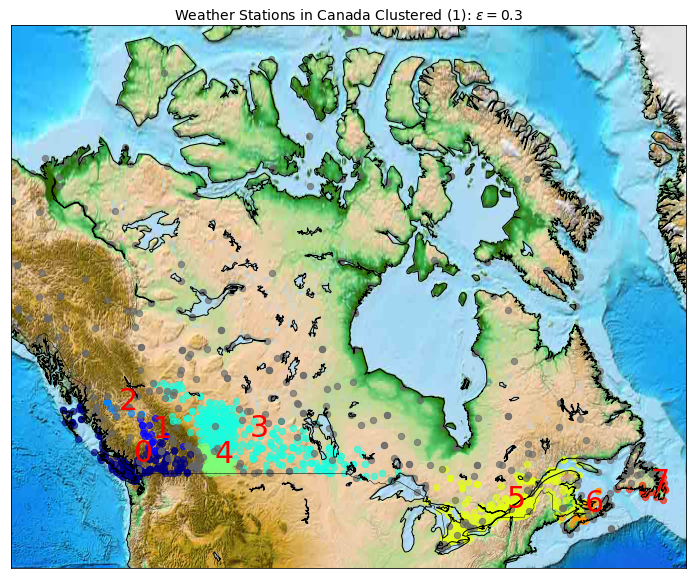

In [0]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
#my_map.drawmapboundary()
#my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.drawlsmask(land_color='orange', ocean_color='skyblue')
#my_map.shadedrelief()
#my_map.bluemarble()
#my_map.shadedrelief()
my_map.etopo()

# To create a color map
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))



#Visualization1
for clust_number in set(labels):
    c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[np.int(clust_number)])
    clust_set = weather_df[weather_df.Clus_Db == clust_number]                    
    my_map.scatter(clust_set.xm, clust_set.ym, color =c,  marker='o', s= 40, alpha = 0.65)
    if clust_number != -1:
        cenx=np.mean(clust_set.xm) 
        ceny=np.mean(clust_set.ym) 
        plt.text(cenx,ceny,str(clust_number), fontsize=30, color='red',)
        print ("Cluster "+str(clust_number)+', Average Mean Temp: '+ str(np.mean(clust_set.Tm)))
plt.title(r"Weather Stations in Canada Clustered (1): $ \epsilon = 0.3$", fontsize=14)        
plt.savefig("etopo_cluster.png", dpi=300)

In [0]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
weather_df_clus_temp = weather_df[["Tm", "Tx", "Tn", "xm", "ym"]]
weather_df_clus_temp = StandardScaler().fit_transform(weather_df_clus_temp)

db = DBSCAN(eps=0.4, min_samples=10).fit(weather_df_clus_temp)
labels = db.labels_
print (labels[0:10])
weather_df["Clus_Db"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels))

[0 0 0 0 0 0 0 0 0 0]


Cluster 0, Average Mean Temp: 4.494871794871795
Cluster 1, Average Mean Temp: -13.924057217165142


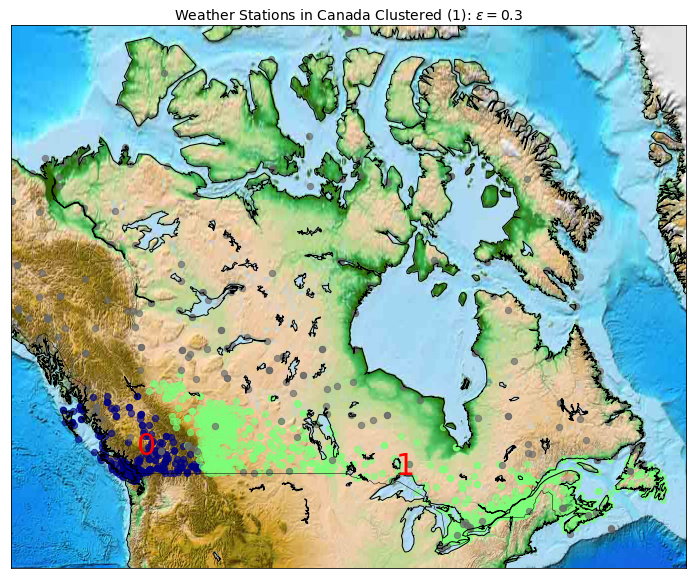

In [0]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
#my_map.drawmapboundary()
#my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.drawlsmask(land_color='orange', ocean_color='skyblue')
#my_map.shadedrelief()
#my_map.bluemarble()
#my_map.shadedrelief()
my_map.etopo()

# To create a color map
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))



#Visualization1
for clust_number in set(labels):
    c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[np.int(clust_number)])
    clust_set = weather_df[weather_df.Clus_Db == clust_number]                    
    my_map.scatter(clust_set.xm, clust_set.ym, color =c,  marker='o', s= 40, alpha = 0.65)
    if clust_number != -1:
        cenx=np.mean(clust_set.xm) 
        ceny=np.mean(clust_set.ym) 
        plt.text(cenx,ceny,str(clust_number), fontsize=30, color='red',)
        print ("Cluster "+str(clust_number)+', Average Mean Temp: '+ str(np.mean(clust_set.Tm)))
plt.title(r"Weather Stations in Canada Clustered (1): $ \epsilon = 0.3$", fontsize=14)        
plt.savefig("etopo_cluster.png", dpi=300)